In [1]:
#Copy-pasted from https://github.com/hannorein/rebound/blob/master/ipython_examples/CloseEncounters.ipynb

import rebound
import numpy as np
def setupSimulation():
    sim = rebound.Simulation()
    sim.integrator = "ias15" # IAS15 is the default integrator, so we don't need this line
    sim.add(m=1.)
    sim.add(m=1e-3,a=1.)
    sim.add(m=5e-3,a=1.25)
    sim.move_to_com()
    return sim

In [3]:
sim = setupSimulation()
sim.integrate(100.*2.*np.pi)

In [3]:
for o in sim.calculate_orbits():
    print(o)

<rebound.Orbit instance, a=4.79596389843 e=0.718624643677 inc=0.0 Omega=0.0 omega=2.73520208207 f=-2.06744745317>
<rebound.Orbit instance, a=1.04238739677 e=0.122392957814 inc=0.0 Omega=0.0 omega=-0.355162818472 f=-1.45023075481>


In [4]:
sim = setupSimulation() # Resets everything
sim.exit_min_distance = 0.15
Noutputs = 1000
times = np.linspace(0,100.*2.*np.pi,Noutputs)
distances = np.zeros(Noutputs)
ps = sim.particles # ps is now an array of pointers. It will update as the simulation runs.
try:
    for i,time in enumerate(times):
        sim.integrate(time)
        dp = ps[1] - ps[2]   # Calculates the coponentwise difference between particles 
        distances[i] = np.sqrt(dp.x*dp.x+dp.y*dp.y+dp.z*dp.z)
except rebound.Encounter as error:
    print(error)

Two particles had a close encounter (d<exit_min_distance).


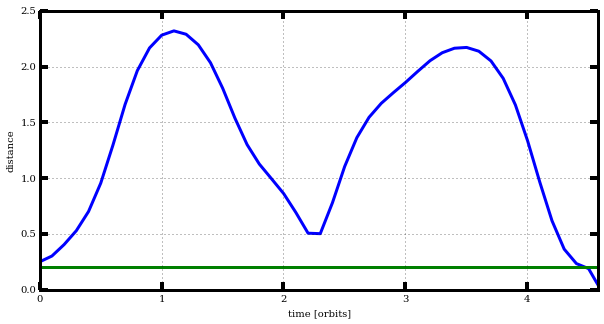

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel("time [orbits]")
ax.set_xlim([0,sim.t/(2.*np.pi)])
ax.set_ylabel("distance")
plt.plot(times/(2.*np.pi), distances);
plt.plot([0.0,12],[0.2,0.2]); # Plot our close encounter criteria;

In [7]:
sim = setupSimulation() # Resets everything
sim.exit_min_distance = 0.15
Noutputs = 1000
times = np.linspace(0,100.*2.*np.pi,Noutputs)
distances = np.zeros(Noutputs)
ps = sim.particles # ps is now an array of pointers. It will update as the simulation runs.
try:
    for i,time in enumerate(times):
        sim.integrate(time)
        dp = ps[1] - ps[2]   # Calculates the coponentwise difference between particles 
        distances[i] = np.sqrt(dp.x*dp.x+dp.y*dp.y+dp.z*dp.z)
except rebound.Encounter as error:
    print(error)

Two particles had a close encounter (d<exit_min_distance).


In [8]:
from itertools import combinations
def mergeParticles(sim):
    # Find two closest particles
    min_d2 = 1e9 # large number
    ps = sim.particles
    for i1, i2 in combinations(range(sim.N),2): # get all pairs of indices
        dp = ps[i1] - ps[i2]   # Calculates the coponentwise difference between particles 
        d2 = dp.x*dp.x+dp.y*dp.y+dp.z*dp.z
        if d2<min_d2:
            min_d2 = d2
            col_i1 = i1
            col_i2 = i2
    
    cp1 = ps[col_i1]
    cp2 = ps[col_i2]
    # Merge two closest particles
    
    sum_mass = cp1.m + cp2.m
    mergedPlanet = (cp1*cp1.m + cp2*cp2.m)/sum_mass 
    mergedPlanet.m  = sum_mass
    sim.remove(index=col_i1) 
    sim.remove(index=col_i1)
    sim.add(mergedPlanet, assignHash=True)

sim = setupSimulation() # Resets everything
sim.exit_min_distance = 0.15
print("Number of particles at the beginning of the simulation: %d."%sim.N)
for i,time in enumerate(times):
    try:
        sim.integrate(time)
    except rebound.Encounter as error:
        print(error)
        mergeParticles(sim)
print("Number of particles at the end of the simulation: %d."%sim.N)

Number of particles at the beginning of the simulation: 3.
Two particles had a close encounter (d<exit_min_distance).
Number of particles at the end of the simulation: 2.


In [2]:
sim = rebound.Simulation()
sim.integrator = "ias15" 
sim.collision = "direct"
sim.collision_resolve = "merge"
sim.add(m=1.)
sim.add(m=1e-3,a=1.,r=np.sqrt(1e-3/3.))
sim.add(m=5e-3,a=1.25,r=1.25*np.sqrt(5e-3/3.))
print("Particles in the simulation at t=%6.1f: %d"%(sim.t,sim.N))
sim.integrate(100.)
print("Particles in the simulation at t=%6.1f: %d"%(sim.t,sim.N))

Particles in the simulation at t=   0.0: 3
Particles in the simulation at t= 100.0: 2


In [5]:
sim = rebound.Simulation()
sim.getWidget()

In [3]:
for i in range(10):
    sim.add(m=1e-3,a=0.4+0.1*i,inc=0.03*i,omega=5.*i) # Jupiter mass planets on close orbits
sim.move_to_com() # Move to the centre of mass frame

In [5]:
sim.integrate(500)

/Users/brian/anaconda/lib/python2.7/site-packages/rebound/simulation.py:518: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


In [4]:
sim.getWidget(size=(400,200),orbits=False)

In [5]:
widget_1 = sim.getWidget(orientation=(0,0,0,1),scale=2)
widget_2 = sim.getWidget(orientation=(0,1,0,1),scale=2,size=(50,200))
widget_3 = sim.getWidget(orientation=(1,0,0,1),scale=2,size=(200,50))
from ipywidgets import HBox, VBox
VBox((widget_3,HBox((widget_1, widget_2))))